In [119]:
import pandas as pd

comments_segmented = pd.read_csv("Comments/all_comments.csv")
comments_segmented.head()


,ID,Comment
0,fnztjy,"I know this place. The owner is a cool guy, bu..."
1,fnztjy,Now I'm 100 sure I'll come visit your country ...
2,fnztjy,r/HumansBeingBros
3,fnztjy,Wholesome.
4,fnztjy,I was planning to visit Nepal sometime in Apri...


In [120]:
comments_segmented.dropna(inplace = True)
comments_segmented.head()

,ID,Comment
0,fnztjy,"I know this place. The owner is a cool guy, bu..."
1,fnztjy,Now I'm 100 sure I'll come visit your country ...
2,fnztjy,r/HumansBeingBros
3,fnztjy,Wholesome.
4,fnztjy,I was planning to visit Nepal sometime in Apri...


In [121]:
import re
for index, row in comments_segmented.iterrows():
    text = row["Comment"]
    cleaned = re.sub(r'[?|!|\'|"|#|%|$|@|*|(|)|-|_|=|+]',r' ', text)
    cleaned = cleaned.lower()
    cleaned = re.sub(r'[^\x00-\x7F]+', ' ', cleaned)
    url_pattern = r'https\S*|http\S*|www\.\S*'
    cleaned = re.sub(url_pattern, r' ', cleaned)
    cleaned = re.sub(r'\d',' ', cleaned)
    cleaned = re.sub(r'[^\w\s]', ' ', cleaned)
    cleaned = ' '.join(cleaned.split())
    comments_segmented.at[index, "Comment"] = cleaned

comments_segmented

,ID,Comment
0,fnztjy,i know this place the owner is a cool guy but ...
1,fnztjy,now i m sure i ll come visit your country when...
2,fnztjy,r humansbeingbros
3,fnztjy,wholesome
4,fnztjy,i was planning to visit nepal sometime in apri...
...,...,...
7064,j93jhd,is this satirical even if its not its cringy af
7065,j93jhd,vaag muji bleep bloop i m a bot this comment w...
7066,j93jhd,a centuries old enslaved sanghi bhaiyya who is...
7067,j93jhd,i reply to braindead retards on life support o...


In [122]:
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from nltk.corpus import wordnet
import nltk
from nltk.stem import WordNetLemmatizer
nltk.download('punkt')
nltk.download('wordnet')
nltk.download('averaged_perceptron_tagger')

stop_words = set(stopwords.words('english'))

def get_wordnet_pos(treebank_tag):
    if treebank_tag.startswith('J'):
        return wordnet.ADJ
    elif treebank_tag.startswith('V'):
        return wordnet.VERB
    elif treebank_tag.startswith('N'):
        return wordnet.NOUN
    elif treebank_tag.startswith('R'):
        return wordnet.ADV
    else:
        return wordnet.NOUN  # Default to NOUN if no specific tag is found

for index, row in comments_segmented.iterrows():
    text = row["Comment"]
    tokens = word_tokenize(text)
    filtered_tokens = [word for word in tokens if word not in stop_words and len(word) >= 3]
    lemmatizer = WordNetLemmatizer()
    pos_tags = nltk.pos_tag(filtered_tokens)
    # Lemmatization with POS tagging
    lemmatized_tokens = [lemmatizer.lemmatize(token, get_wordnet_pos(pos_tag))
                     for token, pos_tag in pos_tags]
    processed_comment = ' '.join(lemmatized_tokens)
    comments_segmented.at[index, "Comment"] = processed_comment

comments_segmented

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\mannj\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\mannj\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     C:\Users\mannj\AppData\Roaming\nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!


,ID,Comment
0,fnztjy,know place owner cool guy like customer smoke ...
1,fnztjy,sure come visit country lovely
2,fnztjy,humansbeingbros
3,fnztjy,wholesome
4,fnztjy,plan visit nepal sometime april one last stops...
...,...,...
7064,j93jhd,satirical even cringy
7065,j93jhd,vaag muji bleep bloop bot comment make anti po...
7066,j93jhd,century old enslave sanghi bhaiyya beat black ...
7067,j93jhd,reply braindead retard life support twice mont...


In [125]:
for index, row in comments_segmented.iterrows():
    if(len(row["Comment"]) <= 1):
        comments_segmented.drop(index, inplace=True)
file_path = 'Comments/processsed_data.csv'

# Save the DataFrame to a CSV file at the specified location
comments_segmented.to_csv(file_path, index=False)

In [126]:
#EDA

import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud
from textblob import TextBlob
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.decomposition import LatentDirichletAllocation

comments_segmented.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6876 entries, 0 to 7068
Data columns (total 2 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   ID       6876 non-null   object
 1   Comment  6876 non-null   object
dtypes: object(2)
memory usage: 161.2+ KB


In [127]:
comments_segmented.describe()

,ID,Comment
count,6876,6876
unique,100,6354
top,x66zt4,remove
freq,464,72


nepal      828
like       595
people     548
get        475
one        415
          ... 
maileyy      1
dekhey       1
estoo        1
basment      1
lololol      1
Length: 12050, dtype: int64


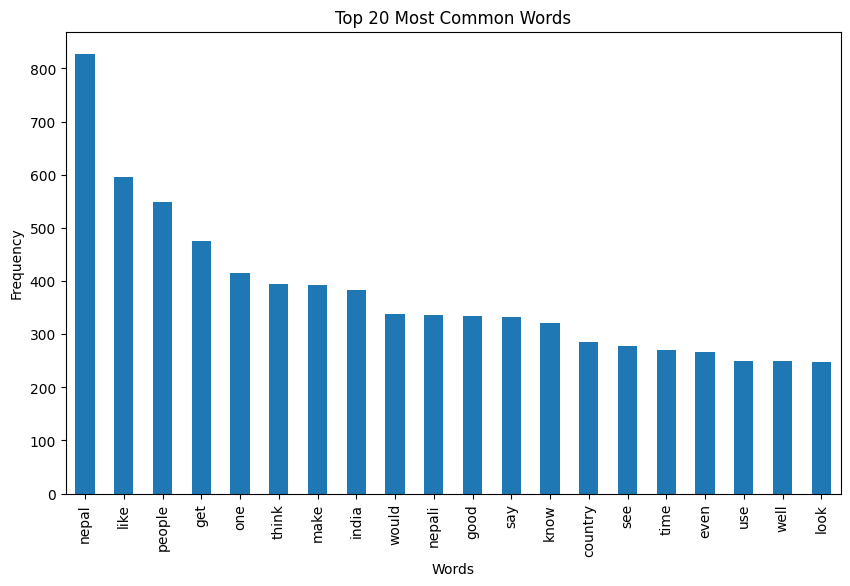

In [129]:
# Word Frequency Analysis
word_freq = pd.Series(' '.join(comments_segmented['Comment']).split()).value_counts()
print(word_freq)
word_freq[:20].plot(kind='bar', figsize=(10, 6))
plt.title('Top 20 Most Common Words')
plt.xlabel('Words')
plt.ylabel('Frequency')
plt.show()

In [103]:
print("Number of Distinct words in the entire corpus: ", len(word_freq))

Number of Distinct words in the entire corpus:  12123


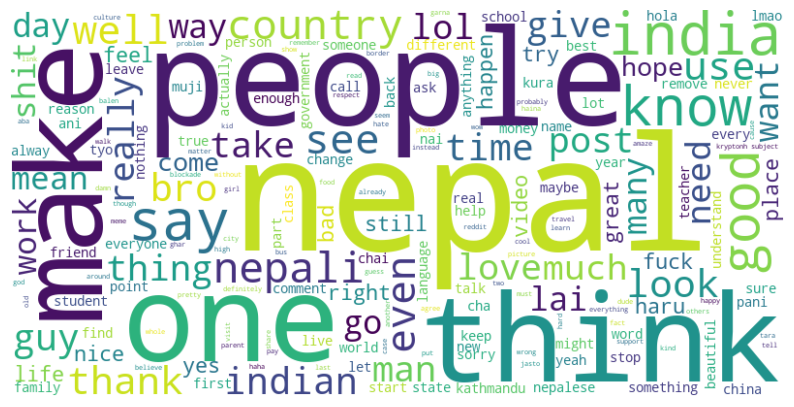

In [130]:
# Word Cloud
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(' '.join(comments_segmented['Comment']))
plt.figure(figsize=(10, 6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

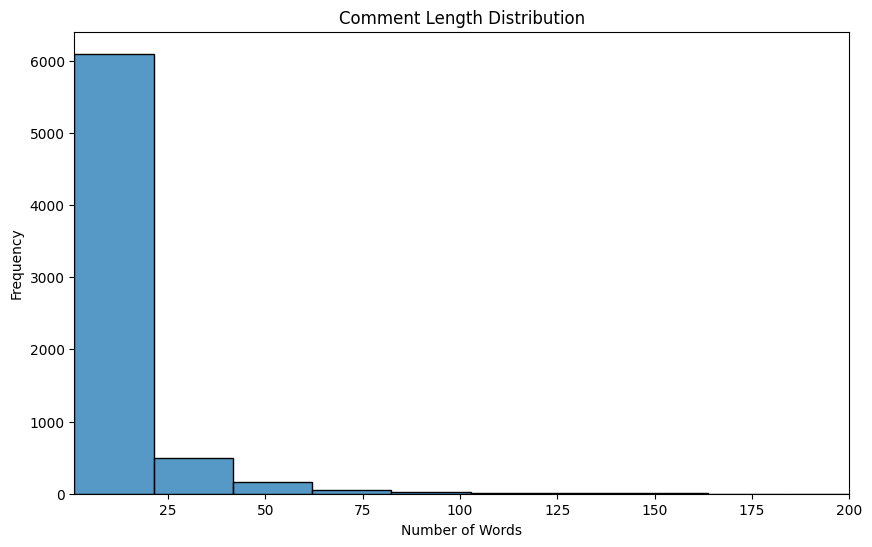

In [131]:
# Comment Length Distribution
comments_segmented['Comment_Length'] = comments_segmented['Comment'].apply(lambda x: len(x.split()))
plt.figure(figsize = (10,6))
sns.histplot(data=comments_segmented, x='Comment_Length', bins=20)
plt.title('Comment Length Distribution')
plt.xlabel('Number of Words')
plt.ylabel('Frequency')
plt.xlim(xmin=1, xmax = 200)
plt.show()

In [132]:
print("Maximum number of words in a Comment: ", max(comments_segmented["Comment_Length"]))

Maximum number of words in a Comment:  408


In [134]:
comments_array = []
for index, row in comments_segmented.iterrows():
    comments_array.append(row["Comment"])

count_vect = CountVectorizer()
count_matrix = count_vect.fit_transform(comments_array)
count_array = count_matrix.toarray()
print(count_vect.get_feature_names_out())
vectored_comments = pd.DataFrame(data=count_array,columns = count_vect.get_feature_names_out())
print(vectored_comments)

['aaaaaaaaaaa' 'aaaaaaaaaaaa' 'aaachi' ... 'zurich' 'zuv' 'zxt']
      aaaaaaaaaaa  aaaaaaaaaaaa  aaachi  aaah  aaaune  aab  aaba  aabela  \
0               0             0       0     0       0    0     0       0   
1               0             0       0     0       0    0     0       0   
2               0             0       0     0       0    0     0       0   
3               0             0       0     0       0    0     0       0   
4               0             0       0     0       0    0     0       0   
...           ...           ...     ...   ...     ...  ...   ...     ...   
6871            0             0       0     0       0    0     0       0   
6872            0             0       0     0       0    0     0       0   
6873            0             0       0     0       0    0     0       0   
6874            0             0       0     0       0    0     0       0   
6875            0             0       0     0       0    0     0       0   

      aaceluoepehlyb  